In [1]:
import scipy
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.io import loadmat
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
#import yasa
from sklearn.pipeline import Pipeline
#from mne.decoding import CSP
from sklearn.model_selection import ShuffleSplit, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import Linear DiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import keras
from keras import Sequential
from keras.layers import *
from keras.callbacks import *

import tensorflow as tf

In [2]:
matrixodb = scipy.io.loadmat('./data/P1_odb.mat')
matrixstd = scipy.io.loadmat('./data/P1_std.mat')
P1odb = pd.DataFrame.from_dict(matrixodb['E_odb'])
P1std = pd.DataFrame.from_dict(matrixstd['E_std'])
P1odb['trig'] = np.ones((150))*1

In [3]:
P1std['trig'] = np.ones((1050))*-1

In [4]:
P1std

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,trig
0,13.841465,14.016478,13.608346,13.076333,13.132714,14.334297,16.733438,19.768959,22.448285,23.726450,...,-0.619062,-0.784734,-0.962076,-0.908263,-0.382244,0.731054,2.330177,4.110266,5.700409,-1.0
1,-8.026854,-8.770455,-10.028952,-11.142821,-11.614986,-11.369499,-10.746711,-10.268088,-10.339574,-11.062575,...,0.504484,2.032739,3.044166,3.268503,2.679951,1.502920,0.152074,-0.872152,-1.128146,-1.0
2,-0.421857,-1.487404,-1.908706,-1.350003,0.246942,2.630587,5.339121,7.865506,9.809033,10.968539,...,-5.011193,-4.826156,-4.194591,-3.471207,-3.064030,-3.214106,-3.860626,-4.665490,-5.185175,-1.0
3,-5.354894,-8.259110,-10.150105,-11.017689,-11.206920,-11.224907,-11.486142,-12.116610,-12.915523,-13.496702,...,0.926762,2.275507,2.962968,2.708990,1.620352,0.131075,-1.208070,-1.972975,-2.031624,-1.0
4,7.557720,9.563675,10.701182,10.909864,10.404051,9.558844,8.761528,8.281632,8.196336,8.393342,...,2.998839,0.689092,-1.862000,-4.025903,-5.248569,-5.254004,-4.139067,-2.305283,-0.257718,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1.357398,2.466432,3.558555,4.602108,5.521307,6.151947,6.277707,5.745943,4.594575,3.091907,...,7.450555,5.842030,3.411766,0.447377,-2.688073,-5.615070,-8.020919,-9.732377,-10.736813,-1.0
1046,-3.983711,-1.561955,-0.136934,0.471325,0.713084,1.160406,2.274150,4.187171,6.613048,8.939756,...,3.694667,4.529326,4.850862,4.748793,4.344344,3.773124,3.173643,2.665061,2.308758,-1.0
1047,10.598088,8.620539,5.841647,2.932392,0.648451,-0.444166,-0.207855,1.003663,2.509650,3.610863,...,-10.984124,-9.771764,-7.984591,-6.095288,-4.406061,-2.954964,-1.524098,0.250010,2.701372,-1.0
1048,-1.867614,-2.330385,-2.432316,-2.346067,-2.236152,-2.212695,-2.310735,-2.489244,-2.652670,-2.693350,...,1.506468,2.015058,3.189184,4.744303,6.332323,7.623258,8.387483,8.556573,8.239670,-1.0


In [5]:
df = pd.concat([P1odb, P1std[:150]])

In [6]:
df_shuffled = df.sample(frac=1, random_state=0)

In [7]:
df_shuffled

,0,1,2,3,4,5,6,7,8,9,...,1591,1592,1593,1594,1595,1596,1597,1598,1599,trig
58,16.698593,15.510970,13.428503,10.596344,7.353388,4.126155,1.329242,-0.710311,-1.816214,-2.013299,...,-0.650530,-0.223272,0.429985,1.321030,2.273486,2.992694,3.244498,3.025560,2.610225,-1.0
38,5.577370,6.788708,7.437758,7.441143,6.792380,5.554695,3.854287,1.853852,-0.282336,-2.405977,...,0.860546,3.871240,6.496593,7.976019,7.715852,5.596432,2.132859,-1.635657,-4.519054,-1.0
12,-8.982438,-8.160075,-6.726506,-4.851311,-2.617586,-0.172493,2.164200,3.948484,4.788341,4.524074,...,-10.198311,-9.391767,-7.701882,-5.446676,-3.051563,-0.876675,0.899796,2.286692,3.411331,1.0
71,-7.441651,-5.895734,-3.711649,-1.503413,0.134588,0.833375,0.566466,-0.377180,-1.572462,-2.721916,...,4.146202,3.791434,3.114345,2.328176,1.762922,1.755584,2.526042,4.081563,6.182592,-1.0
89,-5.651894,-3.582574,-0.947415,1.939962,4.725315,7.090176,8.741288,9.342631,8.480465,5.743644,...,-6.784328,-6.342064,-5.905384,-5.352083,-4.686168,-3.983064,-3.279095,-2.508212,-1.555614,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,8.368321,8.989989,9.691307,10.031623,9.567975,8.063017,5.628908,2.736570,0.075177,-1.684154,...,-8.828207,-7.503262,-5.519452,-3.044536,-0.417649,1.901667,3.487873,4.128493,3.922812,-1.0
42,-14.468827,-14.419576,-14.584207,-14.779534,-14.624085,-13.802181,-12.319679,-10.578048,-9.203014,-8.713033,...,-1.726343,-0.260160,0.637416,1.117508,1.521591,2.188256,3.279249,4.722788,6.317880,-1.0
117,-1.709495,-0.408406,0.282815,0.271251,-0.346480,-1.271454,-2.050514,-2.195548,-1.364820,0.454382,...,-0.341020,0.893635,2.718026,5.065439,7.636601,9.921557,11.348936,11.522664,10.427862,1.0
47,0.675938,1.233402,1.714919,2.024559,2.113702,1.995210,1.742043,1.438434,1.091926,0.577868,...,-13.234722,-13.420134,-14.262429,-15.064783,-15.233342,-14.561561,-13.313310,-12.074440,-11.469536,1.0


In [8]:
X = df_shuffled.loc[:, df_shuffled.columns != 'trig'].to_numpy()
y = df_shuffled['trig'].to_numpy()



In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=True, random_state=1, stratify=y)

model = Sequential([Dense(1600, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(500, activation = 'relu'),
#Dense(250, activation = 'relu'),
Dense(250, activation = 'relu', name = 'encoder'),
#Dense(250, activation = 'relu'),
Dense(500, activation = 'relu'),
Dense(1000, activation = 'relu'),
Dense(1600)])

opt = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")


model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mae','acc'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=25, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(x_train, x_train, epochs = 1000, batch_size = 256, verbose = 1) #callbacks=[earlyStopping],

Epoch 1/1000
2/2 [==============================] - 0s 18ms/step - loss: 132.4416 - mae: 8.1964 - acc: 0.0036
Epoch 2/1000
2/2 [==============================] - 0s 18ms/step - loss: 130.1517 - mae: 8.1083 - acc: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 18ms/step - loss: 127.3085 - mae: 8.0370 - acc: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 123.5666 - mae: 7.9453 - acc: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 18ms/step - loss: 118.8192 - mae: 7.8156 - acc: 0.0071
Epoch 6/1000
2/2 [==============================] - 0s 18ms/step - loss: 112.0686 - mae: 7.6453 - acc: 0.0000e+00
Epoch 7/1000
2/2 [==============================] - 0s 18ms/step - loss: 108.1068 - mae: 7.5144 - acc: 0.0071
Epoch 8/1000
2/2 [==============================] - 0s 18ms/step - loss: 102.8982 - mae: 7.3523 - acc: 0.0107
Epoch 9/1000
2/2 [==============================] - 0s 18ms/step - loss: 98.1973 - mae: 7.2253 - acc: 0.

2/2 [==============================] - 0s 19ms/step - loss: 5.5056 - mae: 1.8172 - acc: 0.3517
Epoch 149/1000
2/2 [==============================] - 0s 18ms/step - loss: 5.4049 - mae: 1.7998 - acc: 0.3491
Epoch 150/1000
2/2 [==============================] - 0s 18ms/step - loss: 5.3394 - mae: 1.7862 - acc: 0.3547
Epoch 151/1000
2/2 [==============================] - 0s 18ms/step - loss: 5.2459 - mae: 1.7720 - acc: 0.3767
Epoch 152/1000
2/2 [==============================] - 0s 19ms/step - loss: 5.1646 - mae: 1.7568 - acc: 0.3705
Epoch 153/1000
2/2 [==============================] - 0s 17ms/step - loss: 5.0580 - mae: 1.7376 - acc: 0.3812
Epoch 154/1000
2/2 [==============================] - 0s 18ms/step - loss: 4.9706 - mae: 1.7243 - acc: 0.3793
Epoch 155/1000
2/2 [==============================] - 0s 19ms/step - loss: 4.9587 - mae: 1.7230 - acc: 0.3741
Epoch 156/1000
2/2 [==============================] - 0s 18ms/step - loss: 4.7811 - mae: 1.6881 - acc: 0.3774
Epoch 157/1000
2/2 [=====

2/2 [==============================] - 0s 17ms/step - loss: 1.0232 - mae: 0.7679 - acc: 0.5577
Epoch 297/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0113 - mae: 0.7637 - acc: 0.5879
Epoch 298/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9927 - mae: 0.7564 - acc: 0.5928
Epoch 299/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9974 - mae: 0.7590 - acc: 0.5535
Epoch 300/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9777 - mae: 0.7506 - acc: 0.5610
Epoch 301/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.9713 - mae: 0.7486 - acc: 0.5626
Epoch 302/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9639 - mae: 0.7458 - acc: 0.5876
Epoch 303/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.9498 - mae: 0.7399 - acc: 0.5711
Epoch 304/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.9484 - mae: 0.7406 - acc: 0.5938
Epoch 305/1000
2/2 [=====

2/2 [==============================] - 0s 18ms/step - loss: 1.1950 - mae: 0.7723 - acc: 0.6609
Epoch 445/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2826 - mae: 0.8799 - acc: 0.6363
Epoch 446/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.4463 - mae: 0.9082 - acc: 0.6464
Epoch 447/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.3899 - mae: 0.9151 - acc: 0.6570
Epoch 448/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2493 - mae: 0.8503 - acc: 0.6282
Epoch 449/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6065 - mae: 0.9719 - acc: 0.6327
Epoch 450/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.4443 - mae: 0.8858 - acc: 0.6123
Epoch 451/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.8157 - mae: 1.0163 - acc: 0.6162
Epoch 452/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.0120 - mae: 1.0887 - acc: 0.5853
Epoch 453/1000
2/2 [=====

2/2 [==============================] - 0s 19ms/step - loss: 0.1337 - mae: 0.2806 - acc: 0.8365
Epoch 593/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1284 - mae: 0.2767 - acc: 0.8251
Epoch 594/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1262 - mae: 0.2749 - acc: 0.8319
Epoch 595/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1299 - mae: 0.2770 - acc: 0.8030
Epoch 596/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1284 - mae: 0.2741 - acc: 0.8154
Epoch 597/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1264 - mae: 0.2724 - acc: 0.7985
Epoch 598/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1234 - mae: 0.2700 - acc: 0.8267
Epoch 599/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1208 - mae: 0.2683 - acc: 0.8199
Epoch 600/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1176 - mae: 0.2650 - acc: 0.7949
Epoch 601/1000
2/2 [=====

2/2 [==============================] - 0s 18ms/step - loss: 0.0461 - mae: 0.1663 - acc: 0.8608
Epoch 741/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0441 - mae: 0.1622 - acc: 0.8413
Epoch 742/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0464 - mae: 0.1668 - acc: 0.8475
Epoch 743/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0454 - mae: 0.1649 - acc: 0.8517
Epoch 744/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0530 - mae: 0.1723 - acc: 0.8543
Epoch 745/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0515 - mae: 0.1714 - acc: 0.8566
Epoch 746/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0784 - mae: 0.2140 - acc: 0.8267
Epoch 747/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1062 - mae: 0.2185 - acc: 0.8579
Epoch 748/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1034 - mae: 0.2102 - acc: 0.8543
Epoch 749/1000
2/2 [=====

2/2 [==============================] - 0s 17ms/step - loss: 1.5675 - mae: 0.8213 - acc: 0.7197
Epoch 889/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5144 - mae: 0.7781 - acc: 0.7641
Epoch 890/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.3512 - mae: 0.7274 - acc: 0.7252
Epoch 891/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1997 - mae: 0.6944 - acc: 0.7492
Epoch 892/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0528 - mae: 0.6704 - acc: 0.7544
Epoch 893/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1276 - mae: 0.7131 - acc: 0.7346
Epoch 894/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9738 - mae: 0.6782 - acc: 0.7193
Epoch 895/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8376 - mae: 0.6559 - acc: 0.7515
Epoch 896/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7681 - mae: 0.6424 - acc: 0.7443
Epoch 897/1000
2/2 [=====

In [25]:
intermediate_layer_model = keras.Model(inputs=model.input,
                                 outputs=model.get_layer('encoder').output)

intermediate_output = intermediate_layer_model.predict(x_train)

In [29]:
!htop


>    PID USER      PRI  NI  VIRT   RES   SHR S CPU% MEM%   TIME+  Command          35841 bci        20   0 14.7G 2913M  199M S 1600  4.5  1h27:09 /usr/bin/python35893 bci20   0 14.7G 2908M  199M R 188.  4.5  4:54.82 /usr/bin/python35884 bci20   0 14.7G 2906M  199M R 141.  4.5  4:54.41 /usr/bin/python35885 bci20   0 14.7G 2906M  199M R 141.  4.5  4:54.40 /usr/bin/python35886 bci20   0 14.7G 2906M  199M R 141.  4.5  4:54.07 /usr/bin/python35887 bci20   0 14.7G 2906M  199M R 141.  4.5  4:54.10 /usr/bin/python35888 bci20   0 14.7G 2907M  199M R 141.  4.5  4:54.97 /usr/bin/python35891 bci20   0 14.7G 2907M  199M R 141.  4.5  4:54.28 /usr/bin/python35895 bci20   0 14.7G 2908M  199M R 141.  4.5  4:54.29 /usr/bin/python35896 bci20   0 14.7G 2908M  199M R 141.  4.5  4:54.69 /usr/bin/python35898 bci20   0 14.7G 2908M  199M R 141.  4.5  4:53.18 /usr/bin/python37346 bci20   0 11176  4652  3324 R 141.  0.0  0:00.09 htop35883 bci20   0 14.7G 2906M  199M R 94.1  4.5  4:53.22 /usr/bin/pythonF1Help  F

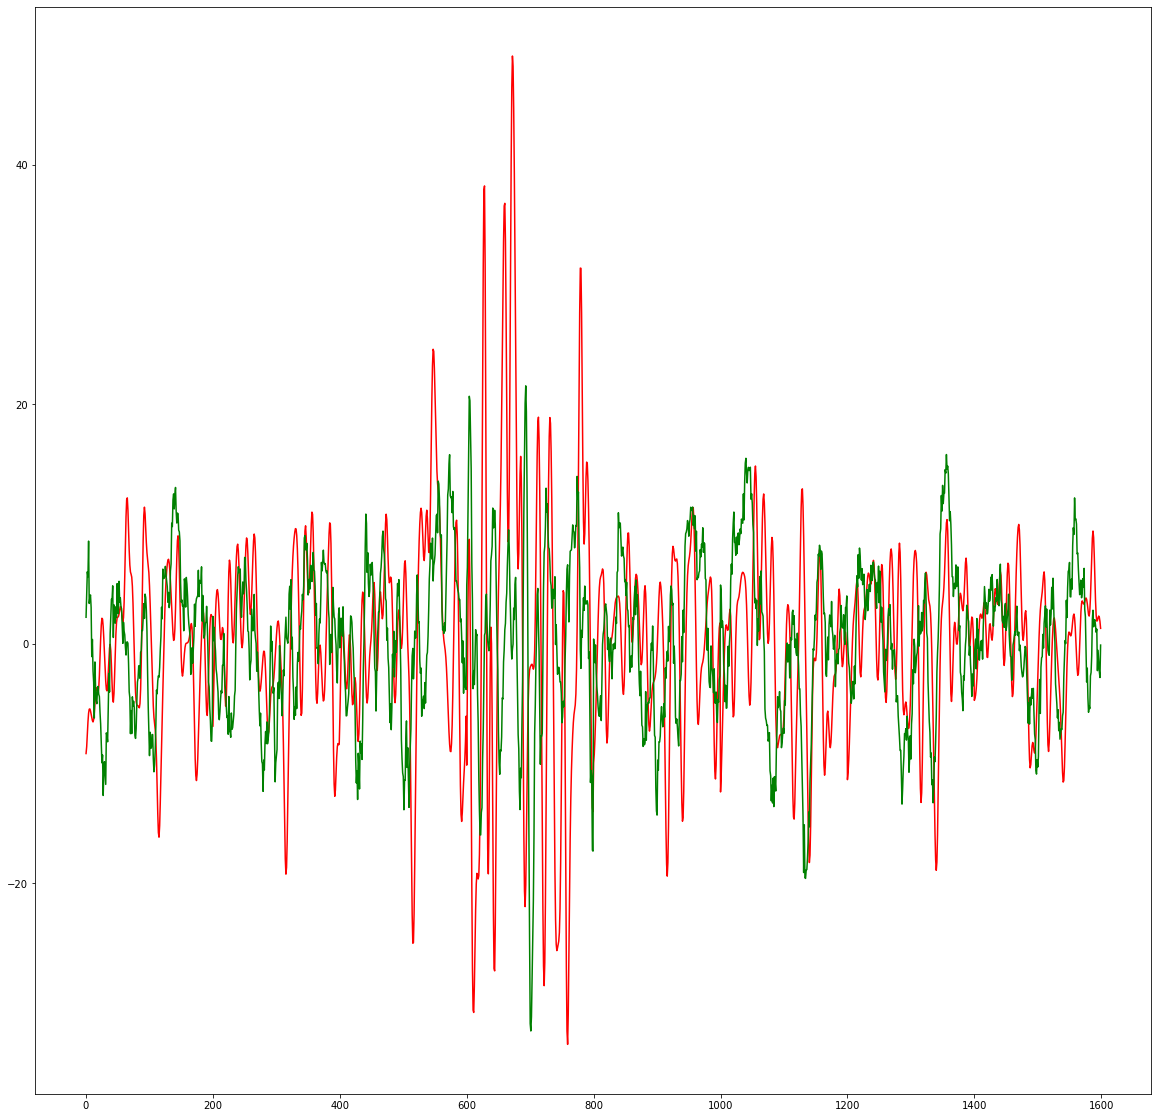

In [14]:
# Make predictions on entire test set
predictions = model.predict(x_test)

# Use score method to get accuracy of model
mse = sklearn.metrics.mean_squared_error(x_test, predictions)

print(mse)

plt.figure(figsize = (20,20))
plt.plot(x_train[34], color = 'red')
plt.plot(predictions[34], color = 'green')
#plt.plot(x_train[0] - predictions[0], color = 'grey')

In [28]:
!pip3 install interpret

     |████████████████████████████████| 5.8 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 275 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 855 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 356 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 259 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 165 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 4.8 

     |████████████████████████████████| 357 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 165 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 4.6 MB/s eta 0:00:01
  Created wheel for dash-table: filename=dash_table-4.11.3-py3-none-any.whl size=1827618 sha256=d1df45214b2faca256b3af3498167c7e6db521c57a58a9b788a82a393d558ef7
  Stored in directory: /home/bci/.cache/pip/wheels/0c/9c/bd/06904831bdaa998ad1f53584553c5e06324814328666699128
  Created wheel for dash-cytoscape: filename=dash_cytoscape-0.2.0-py3-none-any.whl size=3608256 sha256=02916b88ff8922d343a4106d63f7209e2ab945bad756f3b9e203846d2d5bce59
  Stored in directory: /home/bci/.cache/pip/wheels/71/12/ac/c20f982ad35f35dd057950935cafa13d168b26e249304554e5
  Created wheel for dash: filename=dash-1.20.0-py3-none-any.whl size=85831 sha256=c335618c702317f1337e754baf4

In [ ]:
try:
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Mean Absolute Error vs Epoch',fontsize = 15)
    plt.ylabel('Mean Absolute Error',fontsize = 12)
    plt.xlabel('Epochs',fontsize = 12)
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy vs Epoch',fontsize = 15)
    plt.ylabel('Accuracy',fontsize = 12)
    plt.xlabel('Epochs',fontsize = 12)
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('Loss vs Epoch',fontsize = 15)
    plt.ylabel('Loss',fontsize = 12)
    plt.xlabel('Epochs',fontsize = 12)
    plt.legend(['train', 'validation'], loc='best')
    plt.show()
except:
    print("One of the metrics used for plotting graphs is missing! See 'model.compile()'s `metrics` argument.")

In [ ]:
matrixodb = scipy.io.loadmat('./data/P5_odb_down.mat')
matrixstd = scipy.io.loadmat('./data/P5_std_down.mat')
P5odb = pd.DataFrame.from_dict(matrixodb['E_odb_down'])
P5std = pd.DataFrame.from_dict(matrixstd['E_std_down'])
P5odb['trig'] = np.ones((150))*1

In [ ]:
df = pd.concat([P5odb, P5std])
df_shuffled = df.sample(frac=1, random_state=0)


In [ ]:
X = df_shuffled.loc[:, df_shuffled.columns != 'trig'].to_numpy()
y = df_shuffled['trig'].to_numpy()